In [1]:
from sklearn.metrics import ConfusionMatrixDisplay

from gamutrf_model import * 
from gamutrf_dataset import * 

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# MODEL PARAMS
#weights_filepath = "gamutRF/model_weights/resnet18_pdx_and_leesburg_0.02_3.pt"
weights_filepath = "/home/ltindall/RFClassification/gamutRF/model_weights/resnet18_leesburg_split_0.02_1_current.pt"

# MODEL
model = GamutRFModel(pretrained_weights=weights_filepath, device=device)
model.eval()


# DATASET PARAMS
label_dirs= {
    'drone': ([
        '/home/ltindall/RFClassification/data/office/skydiox2/',
        #'/home/ltindall/RFClassification/data/office/skydio2/',
        #'/home/ltindall/RFClassification/data/office/mavic3/',
        #'/home/ltindall/RFClassification/data/office/mini2/',
        #'/home/ltindall/RFClassification/data/gamutrf-birdseye-field-days/leesburg_field_day_2022_06_15/worker1/',
        #'/home/ltindall/RFClassification/data/gamutrf-birdseye-field-days/pdx_field_day_2022_05_26/worker1/gamutrf/'
    ]), 
#     'wifi_2_4': ([
#         '/home/ltindall/RFClassification/data/gamutrf-pdx/07_21_2022/wifi_2_4/',
#     ]), 
#     'wifi_5': ([
#         '/home/ltindall/RFClassification/data/gamutrf-pdx/07_21_2022/wifi_5/',
#     ]),
}
batch_size = 1
num_workers = 0

# DATASET
sample_secs = model.checkpoint["sample_secs"]
nfft = model.checkpoint["nfft"]
dataset = GamutRFDataset(label_dirs, sample_secs=sample_secs, nfft=nfft, idx_to_class=model.checkpoint["dataset_idx_to_class"])

#dataset,_ = torch.utils.data.random_split(data, [round(p * len(data)) for p in [0.001,0.999]])

# DATALOADER
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, num_workers=num_workers)



label='drone', 5 files


100%|███████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 10.36it/s]





Loaded saved model /home/ltindall/RFClassification/gamutRF/model_weights/resnet18_leesburg_split_0.02_1_current.pt with the following training settings:
Inference sample seconds = 0.02
NFFT = 512
Dataset class to idx mapping: {0: 'drone', 1: 'wifi_2_4', 2: 'wifi_5'}
Training directories = {'drone': ['data/gamutrf-birdseye-field-days/leesburg_field_day_2022_06_15/worker1/', 'data/gamutrf-birdseye-field-days/pdx_field_day_2022_05_26/worker1/gamutrf/'], 'wifi_2_4': ['data/gamutrf-pdx/07_21_2022/wifi_2_4/'], 'wifi_5': ['data/gamutrf-pdx/07_21_2022/wifi_5/']}





100%|███████████████████████████████████████████████████████████████████████████████████| 255/255 [00:17<00:00, 14.61it/s]


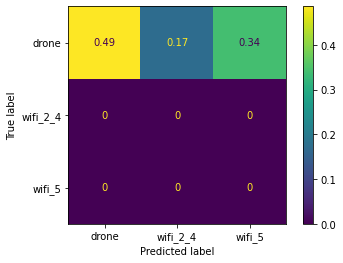

In [3]:
# INFERENCE
predictions = []
labels = []
print(f"\n\n\nLoaded saved model {weights_filepath} with the following training settings:")
print(f"Inference sample seconds = {sample_secs}")
print(f"NFFT = {nfft}")
print(f"Dataset class to idx mapping: {dataset.idx_to_class}")
print(f"Training directories = {model.checkpoint['label_dirs']}\n\n\n")
with torch.no_grad():
    for j,(data,label) in enumerate(tqdm(dataloader)): 
        data = data.to(device)
        label = label.to(device)

        out = model(data)
        _, prediction = torch.max(out, 1)
        
        predictions.extend(prediction.detach().cpu().numpy())
        labels.extend(label.detach().cpu().numpy())

        #correct = preds == label.data

# Display results as confusion matrix 
disp = ConfusionMatrixDisplay.from_predictions(labels, predictions, display_labels=[model.checkpoint["dataset_idx_to_class"][y] for y in np.unique(predictions+labels)], normalize='true')
disp.figure_.savefig(f"confusion_matrix_inference_{model.checkpoint['experiment_name']}.png")


In [4]:
print(labels)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
